# **Support Vector Machine (SVM)**

Import Libraries

In [1]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

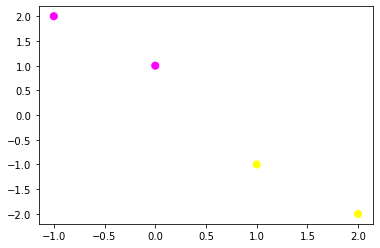

In [2]:
data = np.array([[1, -1], [2, -2], [0, 1], [-1, 2]])
label = np.array([1, 1, -1, -1])

plt.scatter(data[:,0], data[:,1], c=label, s=50, cmap='spring')
plt.show()

In [4]:
svmmodel = svm.SVC(kernel='linear')
svmmodel.fit(data, label)

SVC(kernel='linear')

In [5]:
svmmodel.support_    # indices of support vectors, 어느 인덱스가 서포트 벡터인지

array([2, 0], dtype=int32)

In [6]:
svmmodel.support_vectors_    # support vectors

array([[ 0.,  1.],
       [ 1., -1.]])

In [7]:
svmmodel.coef_    # a weight vector w (size: # of features)

array([[ 0.4, -0.8]])

In [8]:
svmmodel.intercept_    # bias (w0)

array([-0.2])

(50,)
(50,)


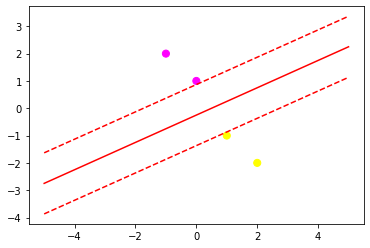

In [9]:
w = svmmodel.coef_[0]
slope = -w[0] / w[1]
margin = 1 / np.sqrt(np.sum(w ** 2))

xx = np.linspace(-5,5)
yy = slope * xx - svmmodel.intercept_[0] / w[1]        # decisoin boundary
yy1 = slope * xx - svmmodel.intercept_[0] / w[1] + margin    # margin
yy2 = slope * xx - svmmodel.intercept_[0] / w[1] - margin    # margin

print(xx.shape)
print(yy.shape)

plt.scatter(data[:,0], data[:,1], c=label, s=50, cmap='spring')
plt.plot(xx, yy, 'r')
plt.plot(xx, yy1, 'r--')
plt.plot(xx, yy2, 'r--')
plt.show()

Import Libraries

In [10]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Generate some (random) data

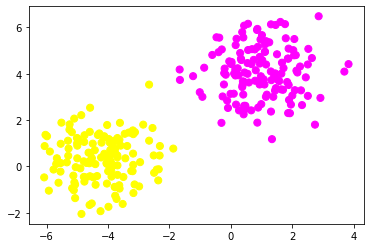

In [11]:
X, Y = datasets.make_blobs(400, 2, centers=2, random_state=3, cluster_std=1.0)
TrainX, TestX, TrainY, TestY = train_test_split(X, Y, test_size=0.3, random_state=0)

plt.scatter(TrainX[:,0], TrainX[:,1], c=TrainY, s=50, cmap='spring')
plt.show()

**Train SVM**

In [12]:
svmmodel = svm.SVC(kernel='linear')
svmmodel.fit(TrainX, TrainY)

SVC(kernel='linear')

Let's check out the parameters of SVM

In [13]:
svmmodel.support_    # indices of support vectors

array([187, 223, 171, 190], dtype=int32)

In [14]:
svmmodel.support_vectors_    # support vectors

array([[-1.66056331,  3.73285585],
       [-1.66915063,  4.18137725],
       [-2.66398896,  3.53085634],
       [-1.87715618,  0.77166551]])

In [15]:
svmmodel.coef_    # a weight vector w (size: # of features)

array([[-1.02307797, -0.52414831]])

In [16]:
svmmodel.intercept_    # bias (w0)

array([-0.51600961])

(50,)
(50,)


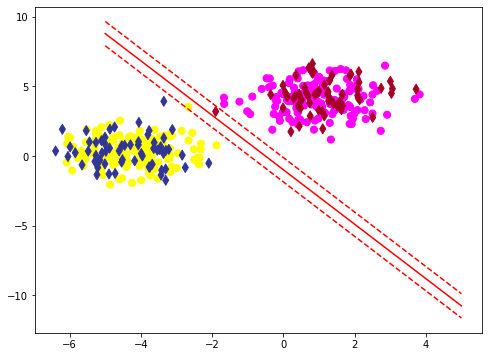

In [17]:
w = svmmodel.coef_[0]
slope = -w[0] / w[1]
margin = 1 / np.sqrt(np.sum(w ** 2))

xx = np.linspace(-5,5)
yy = slope * xx - svmmodel.intercept_[0] / w[1]        # decisoin boundary
yy1 = slope * xx - svmmodel.intercept_[0] / w[1] + margin    # margin
yy2 = slope * xx - svmmodel.intercept_[0] / w[1] - margin    # margin

print(xx.shape)
print(yy.shape)

plt.figure(figsize=(8,6))
plt.scatter(TrainX[:,0], TrainX[:,1], c=TrainY, s=50, cmap='spring')
plt.scatter(TestX[:,0], TestX[:,1], c=TestY, marker='d', s=50, cmap='RdYlBu')
plt.plot(xx, yy, 'r')
plt.plot(xx, yy1, 'r--')
plt.plot(xx, yy2, 'r--')
plt.show()

**Performance Evaluation**

In [18]:
from sklearn import metrics

Accuracy

In [19]:
tr_pred = svmmodel.predict(TrainX)
tr_acc = metrics.accuracy_score(TrainY, tr_pred)

ts_pred = svmmodel.predict(TestX)
ts_acc = metrics.accuracy_score(TestY, ts_pred)

print('Training Accuracy : ', tr_acc)
print('Test Accuracy : ', ts_acc)

Training Accuracy :  1.0
Test Accuracy :  1.0


Confusion Matrix

In [20]:
tr_cmat = metrics.confusion_matrix(TrainY, tr_pred)
print(tr_cmat)

ts_cmat = metrics.confusion_matrix(TestY, ts_pred)
print(ts_cmat)

[[141   0]
 [  0 139]]
[[59  0]
 [ 0 61]]


ROC Analysis

In [21]:
svmmodel = svm.SVC(kernel='linear', probability=True)
svmmodel.fit(TrainX, TrainY)

tr_score = svmmodel.predict_proba(TrainX)
ts_score = svmmodel.predict_proba(TestX)

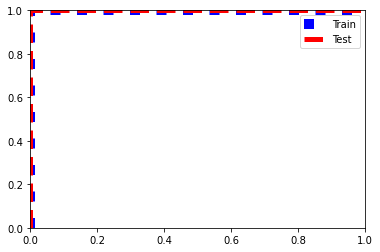

In [22]:
tr_fpr, tr_tpr, tr_th = metrics.roc_curve(TrainY, tr_score[:,1], pos_label=1)
ts_fpr, ts_tpr, ts_th = metrics.roc_curve(TestY, ts_score[:,1], pos_label=1)

plt.plot(tr_fpr, tr_tpr, 'b:', linewidth=10, label='Train')
plt.plot(ts_fpr, ts_tpr, 'r--', linewidth=5, label='Test')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc='best')
plt.show()

In [23]:
tr_auc = metrics.roc_auc_score(TrainY, tr_score[:,1])
print('Training AUC : ', tr_auc)

ts_auc = metrics.roc_auc_score(TestY, ts_score[:,1])
print('Test AUC : ', ts_auc)

Training AUC :  1.0
Test AUC :  1.0


# **Breast Cancer Wisconsin (Diagnostic) Dataset**
*   569 instances (212 Malignant, 357 Benign)
*   30 numerical features (computed from a digitized image of a breast mass)
*   2 classes (Malignant, Benign)


Import Libraries

In [24]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt

**Prepare Data**

In [25]:
wisconsin = datasets.load_breast_cancer()
TrainX, TestX, TrainY, TestY = train_test_split(wisconsin.data, wisconsin.target, test_size=0.7, random_state=0)

**Train SVM**

In [26]:
# svmmodel = svm.SVC(kernel="linear")
svmmodel = svm.SVC(kernel="linear", probability=True)
svmmodel.fit(TrainX, TrainY)

SVC(kernel='linear', probability=True)

**Performance Evaluation**

Accuracy

In [27]:
tr_pred = svmmodel.predict(TrainX)
tr_acc = metrics.accuracy_score(TrainY, tr_pred)

ts_pred = svmmodel.predict(TestX)
ts_acc = metrics.accuracy_score(TestY, ts_pred)

print('Training Accuracy : ', tr_acc)
print('Test Accuracy : ', ts_acc)

Training Accuracy :  0.9823529411764705
Test Accuracy :  0.9548872180451128


Confusion Matrix

In [28]:
tr_cmat = metrics.confusion_matrix(TrainY, tr_pred)
print(tr_cmat)

ts_cmat = metrics.confusion_matrix(TestY, ts_pred)
print(ts_cmat)

[[ 64   2]
 [  1 103]]
[[137   9]
 [  9 244]]


ROC Analysis

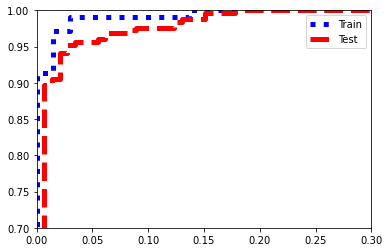

In [29]:
tr_score = svmmodel.predict_proba(TrainX)
ts_score = svmmodel.predict_proba(TestX)

tr_fpr, tr_tpr, tr_th = metrics.roc_curve(TrainY, tr_score[:,1], pos_label=1)
ts_fpr, ts_tpr, ts_th = metrics.roc_curve(TestY, ts_score[:,1], pos_label=1)

plt.plot(tr_fpr, tr_tpr, 'b:', linewidth=5, label='Train')
plt.plot(ts_fpr, ts_tpr, 'r--', linewidth=5, label='Test')
plt.xlim([0.0, 0.3])
plt.ylim([0.7, 1.0])
plt.legend(loc='best')
plt.show()

In [30]:
tr_auc = metrics.roc_auc_score(TrainY, tr_score[:,1])
print('Training AUC : ', tr_auc)

ts_auc = metrics.roc_auc_score(TestY, ts_score[:,1])
print('Test AUC : ', ts_auc)

Training AUC :  0.9972319347319347
Test AUC :  0.9924468027505551


# **Parkinson's Disease Dataset**

*   Speech dataset from Parkinson's Disease (PD) patients and healthy subjects
*   26 features computed from speech recordings
*   Training dataset: 300 instances (150 PD, 150 healthy)
*   Test dataset: 300 instances (150 PD, 150 healthy)

*   Training dataset: 'PD_train_smalldata.csv'
*   Test dataset: 'PD_test_smalldata.csv'


In [31]:
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Prepare Data

In [33]:
tr_dataset = pd.read_csv("./PD_train_smalldata.csv")
tr_dataset

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F18,F19,F20,F21,F22,F23,F24,F25,F26,Class
0,1.420,0.000129,0.684,0.579,2.051,14.412,1.248,5.833,6.005,7.968,...,106.450,121.70,37,34,0.009057,0.000280,30.435,2,22.014,0
1,1.304,0.000065,0.589,0.473,1.766,7.492,0.763,3.021,4.152,7.474,...,172.690,214.28,54,52,0.005004,0.000397,24.390,1,6.745,0
2,1.749,0.000076,0.721,0.832,2.164,24.909,1.986,13.968,24.141,7.321,...,175.940,400.61,188,171,0.004322,0.001113,38.667,3,30.562,0
3,1.329,0.000119,0.625,0.842,1.875,11.607,1.105,4.752,7.551,9.709,...,106.010,115.46,54,52,0.008979,0.000222,5.882,1,4.157,0
4,1.062,0.000054,0.276,0.332,0.827,15.524,1.436,7.513,10.797,22.976,...,157.840,213.64,40,39,0.005117,0.000538,37.500,0,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2.312,0.000165,1.034,0.948,3.103,12.389,1.175,5.041,7.285,14.282,...,132.610,159.01,68,66,0.007155,0.000375,37.662,1,7.620,1
296,3.191,0.000305,1.194,1.175,3.582,13.615,1.282,6.705,7.990,13.992,...,97.607,120.03,37,35,0.009561,0.000874,30.769,1,6.193,1
297,0.395,0.000034,0.223,0.233,0.669,8.957,0.786,5.278,4.991,6.684,...,115.090,120.44,119,118,0.008493,0.000093,0.000,0,0.000,1
298,4.238,0.000273,2.022,1.933,6.067,16.509,1.514,6.857,11.132,19.486,...,76.326,209.55,66,65,0.006433,0.002622,21.818,0,0.000,1


In [34]:
sum(tr_dataset.Class == 0)

150

In [35]:
TrainX = tr_dataset.iloc[:, :-1]
TrainY = tr_dataset.Class

In [36]:
ts_dataset = pd.read_csv("./PD_test_smalldata.csv")
ts_dataset

TestX = ts_dataset.iloc[:, :-1]
TestY = ts_dataset.Class

Normalize Data : Rescale the range of the values
*   0-1 range : rescale the values between 0 and 1
>$x_{new} = \frac{x-x_{min}}{x_{max}-x_{min}}$

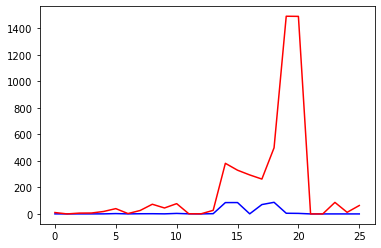

In [37]:
plt.plot(np.arange(0,26), TrainX.min(), 'b')
plt.plot(np.arange(0,26), TrainX.max(), 'r')
plt.show()

In [40]:
TrainXmin = TrainX.min()
TrainXmax = TrainX.max()

TrainX = (TrainX - TrainXmin) / (TrainXmax - TrainXmin)
TestX = (TestX - TrainXmin) / (TrainXmax - TrainXmin)

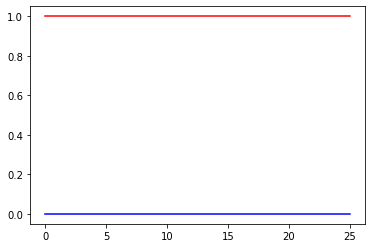

In [41]:
plt.plot(np.arange(0,26), TrainX.min(), 'b')
plt.plot(np.arange(0,26), TrainX.max(), 'r')
plt.show()

**Train SVM**

In [42]:
svmmodel = svm.SVC(kernel="linear", probability=True)
svmmodel.fit(TrainX, TrainY)

SVC(kernel='linear', probability=True)

**Performance Evaluation**

Accuracy

In [43]:
tr_pred = svmmodel.predict(TrainX)
tr_acc = metrics.accuracy_score(TrainY, tr_pred)

ts_pred = svmmodel.predict(TestX)
ts_acc = metrics.accuracy_score(TestY, ts_pred)

print('Training Accuracy : ', tr_acc)
print('Test Accuracy : ', ts_acc)

Training Accuracy :  0.6833333333333333
Test Accuracy :  0.6266666666666667


Confusion Matrix

In [44]:
tr_cmat = metrics.confusion_matrix(TrainY, tr_pred)
print(tr_cmat)

ts_cmat = metrics.confusion_matrix(TestY, ts_pred)
print(ts_cmat)

[[ 99  51]
 [ 44 106]]
[[110  40]
 [ 72  78]]


ROC Analysis

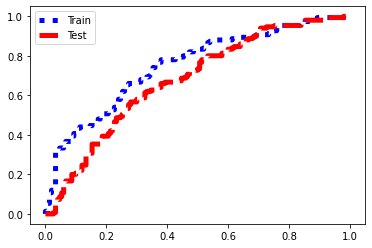

In [45]:
tr_score = svmmodel.predict_proba(TrainX)
ts_score = svmmodel.predict_proba(TestX)

tr_fpr, tr_tpr, tr_th = metrics.roc_curve(TrainY, tr_score[:,1], pos_label=1)
ts_fpr, ts_tpr, ts_th = metrics.roc_curve(TestY, ts_score[:,1], pos_label=1)

plt.plot(tr_fpr, tr_tpr, 'b:', linewidth=5, label='Train')
plt.plot(ts_fpr, ts_tpr, 'r--', linewidth=5, label='Test')
plt.legend(loc='best')
plt.show()

In [46]:
tr_auc = metrics.roc_auc_score(TrainY, tr_score[:,1])
print('Training AUC : ', tr_auc)

ts_auc = metrics.roc_auc_score(TestY, ts_score[:,1])
print('Test AUC : ', ts_auc)

Training AUC :  0.7485777777777777
Test AUC :  0.6773777777777777


In [48]:
def SVMmodel(TrainX, TrainY, TestX, TestY, kernel="rbf"):
  svmmodel = svm.SVC(kernel=kernel, probability=True)
  svmmodel.fit(TrainX, TrainY)

  tr_pred = svmmodel.predict(TrainX)
  tr_acc = metrics.accuracy_score(TrainY, tr_pred)

  ts_pred = svmmodel.predict(TestX)
  ts_acc = metrics.accuracy_score(TestY, ts_pred)

  print('Training Accuracy : ', tr_acc)
  print('Test Accuracy : ', ts_acc)

  tr_score = svmmodel.predict_proba(TrainX)
  ts_score = svmmodel.predict_proba(TestX)

  tr_fpr, tr_tpr, tr_th = metrics.roc_curve(TrainY, tr_score[:,1], pos_label=1)
  ts_fpr, ts_tpr, ts_th = metrics.roc_curve(TestY, ts_score[:,1], pos_label=1)

  plt.plot(tr_fpr, tr_tpr, 'b:', linewidth=5, label='Train')
  plt.plot(ts_fpr, ts_tpr, 'r--', linewidth=5, label='Test')
  plt.legend(loc='best')
  plt.show()

  tr_auc = metrics.roc_auc_score(TrainY, tr_score[:,1])
  print('Training AUC : ', tr_auc)

  ts_auc = metrics.roc_auc_score(TestY, ts_score[:,1])
  print('Test AUC : ', ts_auc)


Training Accuracy :  0.6833333333333333
Test Accuracy :  0.6266666666666667


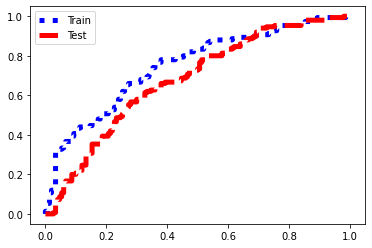

Training AUC :  0.7485999999999999
Test AUC :  0.6774


In [49]:
SVMmodel(TrainX, TrainY, TestX, TestY, kernel="linear")

Training Accuracy :  0.7433333333333333
Test Accuracy :  0.6833333333333333


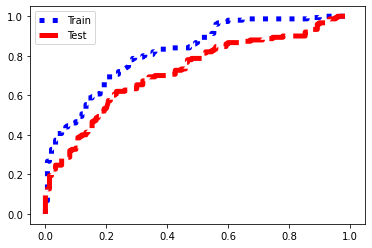

Training AUC :  0.8215111111111111
Test AUC :  0.7221555555555556


In [50]:
SVMmodel(TrainX, TrainY, TestX, TestY, kernel="rbf")


Training Accuracy :  0.77
Test Accuracy :  0.7133333333333334


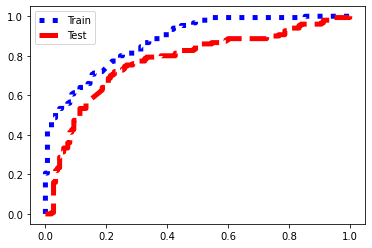

Training AUC :  0.8762666666666666
Test AUC :  0.7736444444444444


In [53]:
SVMmodel(TrainX, TrainY, TestX, TestY, kernel="poly")